### 1.

In [32]:
import numpy as np


"""
Forward Euler time-stepping to solve an ODE at N time-steps for a given value of the time-step size h.

Args:
    h (float): time-step size
    N (int): number of time-steps
Returns:
    y (np.array): solution for all N + 1 time-steps, shape (N + 1,)
"""


def forward_euler(h, N):
    def dydt(t, y):
        return -0.2 * y - 2 * np.cos(2 * t) * y**2

    y0 = 1

    y = np.zeros(N + 1)
    times = np.linspace(0, N * h, N + 1)

    y[0] = y0

    for i in range(N):
        y[i + 1] = y[i] + h * dydt(times[i], y[i])

    return times, y


### 2a.

$h$ must be $\leq \frac{2}{|\lambda|}$ where $\lambda = -0.2$

Thus $\boxed{h \leq 10 s}$ 

### 2b.

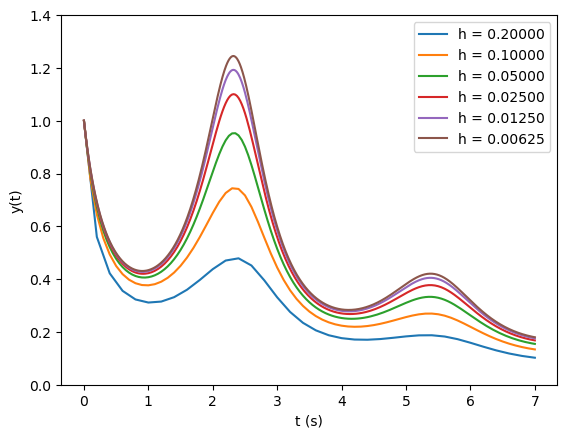

In [33]:
import matplotlib.pyplot as plt

m = np.arange(0, 6)
hs = 0.2 * 0.5**m
ys = []
ts = []

for i, h in enumerate(hs):
    N = int(7 / h)
    t, y = forward_euler(h, N)
    ys.append(y)
    ts.append(t)

    plt.plot(t, y, label=f"h = {h:.5f}")

ax = plt.gca()
ax.set_ylim(0, 1.4)
ax.set_xlabel("t (s)")
ax.set_ylabel("y(t)")
plt.legend()
plt.show()

### 2c. 

### 3a.

$\theta'' = -\frac{g}{L}\theta$

$y_{1} = \theta$, $y_{2} = \theta'$

$y = \begin{bmatrix} y_{1} \\ y_{2} \end{bmatrix} = \begin{bmatrix} \theta \\ \theta' \end{bmatrix}$

$y' = \begin{bmatrix} y_{1}' \\ y_{2}' \end{bmatrix} = \begin{bmatrix} y_{2} \\ y_{2}' \end{bmatrix} = \begin{bmatrix} y_{2} \\ \frac{-g}{L}y_{1} \end{bmatrix}$

$A = \begin{bmatrix} 0 & 1 \\ \frac{-g}{L} & 0 \end{bmatrix}$

$y' = Ay$

with $y(0) = \begin{bmatrix} \theta(0) \\ \theta'(0) \end{bmatrix} = \begin{bmatrix} \theta_{0} \\ \omega_{0} \end{bmatrix}$

### 3b.

The eigenvalues of $A$ are given by solving:

$det(A - \lambda I) = 0$

$det(\begin{bmatrix} -\lambda & 1 \\ \frac{-g}{L} & -\lambda \end{bmatrix}) = 0$

$\lambda^{2} + \frac{g}{L} = 0$

$\lambda = \pm i\sqrt{\frac{g}{L}}$

### 3c.

The forward Euler method will be unstable because the amplification factor $|\sigma| = |1 + \lambda h| \geq 1$ for a finite length $L$ and any time step $h$.

### 3d.

The backward Euler method will be unconditionally stable. The amplification factor is given by: 

$|\sigma| = \frac{1}{\sqrt{1 + \lambda^{2}h^{2}}}$ which will awlays be $\leq 1$

### 3e.

The trapezoidal method will be unconditionally stable. The amplification factor is given by:

$|\sigma| = \frac{\sqrt{1 + \frac{1}{4}\lambda^{2} h^{2}}}{\sqrt{1 + \frac{1}{4}\lambda^{2} h^{2}}}$ which will always be $\leq 1$

### 3f.

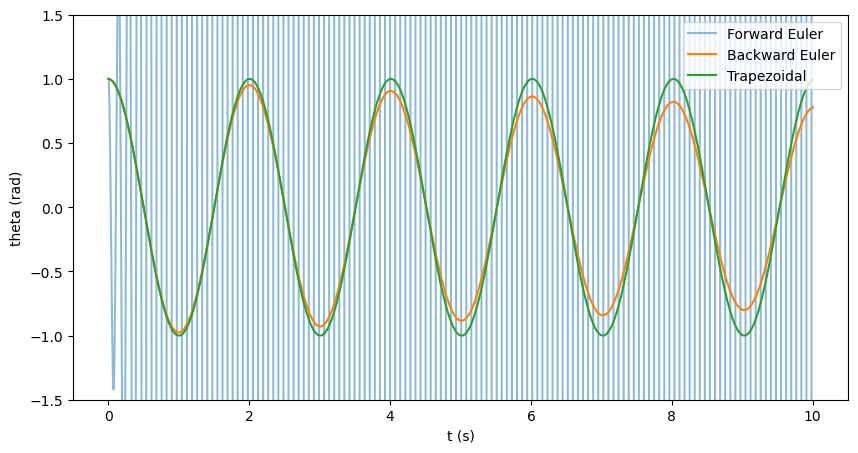

In [24]:
g = 9.81
L = 1


def forward_euler(h, N):
    def update(h, y):
        return np.array([[1, h], [-g / L, 1]]) @ y

    y = np.zeros((N + 1, 2))
    y[0] = np.array([1.0, 0.0])

    for i in range(N):
        y[i + 1] = update(h, y[i])

    return y


def backward_euler(h, N):
    def update(h, y):
        return np.linalg.inv(np.array([[1, -h], [g * h / L, 1]])) @ y

    y = np.zeros((N + 1, 2))
    y[0] = np.array([1.0, 0.0])

    for i in range(N):
        y[i + 1] = update(h, y[i])

    return y


def trapezoidal(h, N):
    update = (
        lambda h, y: np.linalg.inv(
            np.array([[1, -h / 2], [g * h / (2 * L), 1]]))
        @ np.array([[1, h / 2], [-g * h / (2 * L), 1]])
        @ y
    )

    y = np.zeros((N + 1, 2))
    y[0] = np.array([1.0, 0.0])

    for i in range(N):
        y[i + 1] = update(h, y[i])

    return y


h = 0.005
N = int(10 / h)
ts = np.linspace(0, 10, N + 1)

forward_result = forward_euler(h, N)
backward_result = backward_euler(h, N)
trapezoidal_result = trapezoidal(h, N)

plt.plot(ts, forward_result[:, 0], label="Forward Euler", alpha=0.5)
plt.plot(ts, backward_result[:, 0], label="Backward Euler")
plt.plot(ts, trapezoidal_result[:, 0], label="Trapezoidal")

plt.xlabel("t (s)")
plt.ylabel("theta (rad)")
plt.ylim(-1.5, 1.5)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 5)


The forward Euler solution is unstable, as expected. The solutions for the backward Euler and trapezoidal methods are stable, with the backward Euler method decaying throughout the solution. This is the expected result.

### 4a. 

$\theta'' + c\theta' + \frac{g}{L}\theta = 0$

$y = \begin{bmatrix} y_{1} \\ y_{2} \end{bmatrix} = \begin{bmatrix} \theta \\ \theta' \end{bmatrix}$

$y' = \begin{bmatrix} y_{1}' \\ y_{2}' \end{bmatrix}$

$y_{1}' = \theta' = y_{2}$

$y_{2}' = \theta'' = -c\theta' - \frac{g}{L}\theta = -cy_{2} - \frac{g}{L}y_{1}$

$y' = \begin{bmatrix} y_{2} \\ -cy_{2} - \frac{g}{L}y_{1} \end{bmatrix}$

$A = \begin{bmatrix} 0 & 1 \\ \frac{-g}{L} & -c \end{bmatrix}$

$y' = Ay$

### 4b. 

The eigenvalues of $A$ are given by solving:

$det(A - \lambda I) = 0$

$det(\begin{bmatrix} -\lambda & 1 \\ \frac{-g}{L} & -c - \lambda \end{bmatrix}) = 0$

$\lambda^{2} + c\lambda + \frac{g}{L} = 0$

$\lambda = \frac{-c \pm \sqrt{c^{2} - 4\frac{g}{L}}}{2}$



### 4c. 

for $c=4$ and $\frac{g}{L} = 2$, $\lambda = -2 \pm \sqrt{2}$

Then, the max time step is given by:

$h \leq \frac{2}{|\lambda|_{max}}$

$h = \frac{2}{2 + \sqrt{2}}$

### 4d. 

for $c = 4$ and $\frac{g}{L} = 5$, $\lambda = -2 \pm i$

Now, the max time step is given by:

$|1 + h(-2\pm i)| \leq 1$

$(1-2h)^{2} + h^{2} \leq 1$

$h(5h-4) \leq 0$

Thus, $h_{max} = \frac{4}{5}$

### 5a.

$y = \begin{bmatrix} y_{1} \\ y_{2} \end{bmatrix} = \begin{bmatrix} u \\ u' \end{bmatrix}$

$y' = \begin{bmatrix} y_{1}' \\ y_{2}' \end{bmatrix}$

$y_{1}' = u' = y_{2}$

$y_{2}' = u'' = -u^{2}u' - t^{2}u = -y_{1}^{2}y_{2} - t^{2}y_{1}$

$y' = \begin{bmatrix} y_{2} \\ -y_{1}^{2}y_{2} - t^{2}y_{1} \end{bmatrix}$